# shop-customer-data-analysis

#.Q1.find the income
#Q2.show the graphical reprasantation od all coloumns

#importing necessary libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


#loading the dataset

In [15]:
df = pd.read_csv(r"C:\Users\HP\Desktop\INTERNSHIP 5 MARCH\unuploaded\Customers.csv")
print(df)

      CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0              1    Male   19              15000                      39   
1              2    Male   21              35000                      81   
2              3  Female   20              86000                       6   
3              4  Female   23              59000                      77   
4              5  Female   31              38000                      40   
...          ...     ...  ...                ...                     ...   
1995        1996  Female   71             184387                      40   
1996        1997  Female   91              73158                      32   
1997        1998    Male   87              90961                      14   
1998        1999    Male   77             182109                       4   
1999        2000    Male   90             110610                      52   

         Profession  Work Experience  Family Size  
0        Healthcare                

#extracting first-five rows

In [16]:
df.head(5)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


#extracting last-five rows

In [17]:
df.tail(5)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2
1999,2000,Male,90,110610,52,Entertainment,5,2


#determining the shape

In [18]:
df.shape

(2000, 8)

#determining the size

In [19]:
df.size

16000

#checking the null values

In [20]:
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

#determining mode of 'Profession' column

In [21]:
df["Profession"].mode()

0    Artist
Name: Profession, dtype: object

#replacing null values with mode

In [22]:
df["Profession"].fillna(df["Profession"].mode()[0],inplace=True)

In [23]:
# checking the duplicates

In [24]:
df.duplicated().value_counts()

False    2000
dtype: int64

 #checking the information

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              2000 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


#extracting statistical summary

In [26]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


#convert categorical to numerical data

In [27]:
df["Gender"].replace("Female",0,inplace=True)
df["Gender"].replace("Male",1,inplace=True)
df.tail(5)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
1995,1996,0,71,184387,40,Artist,8,7
1996,1997,0,91,73158,32,Doctor,7,7
1997,1998,1,87,90961,14,Healthcare,9,2
1998,1999,1,77,182109,4,Executive,7,2
1999,2000,1,90,110610,52,Entertainment,5,2


#creating the pairplot

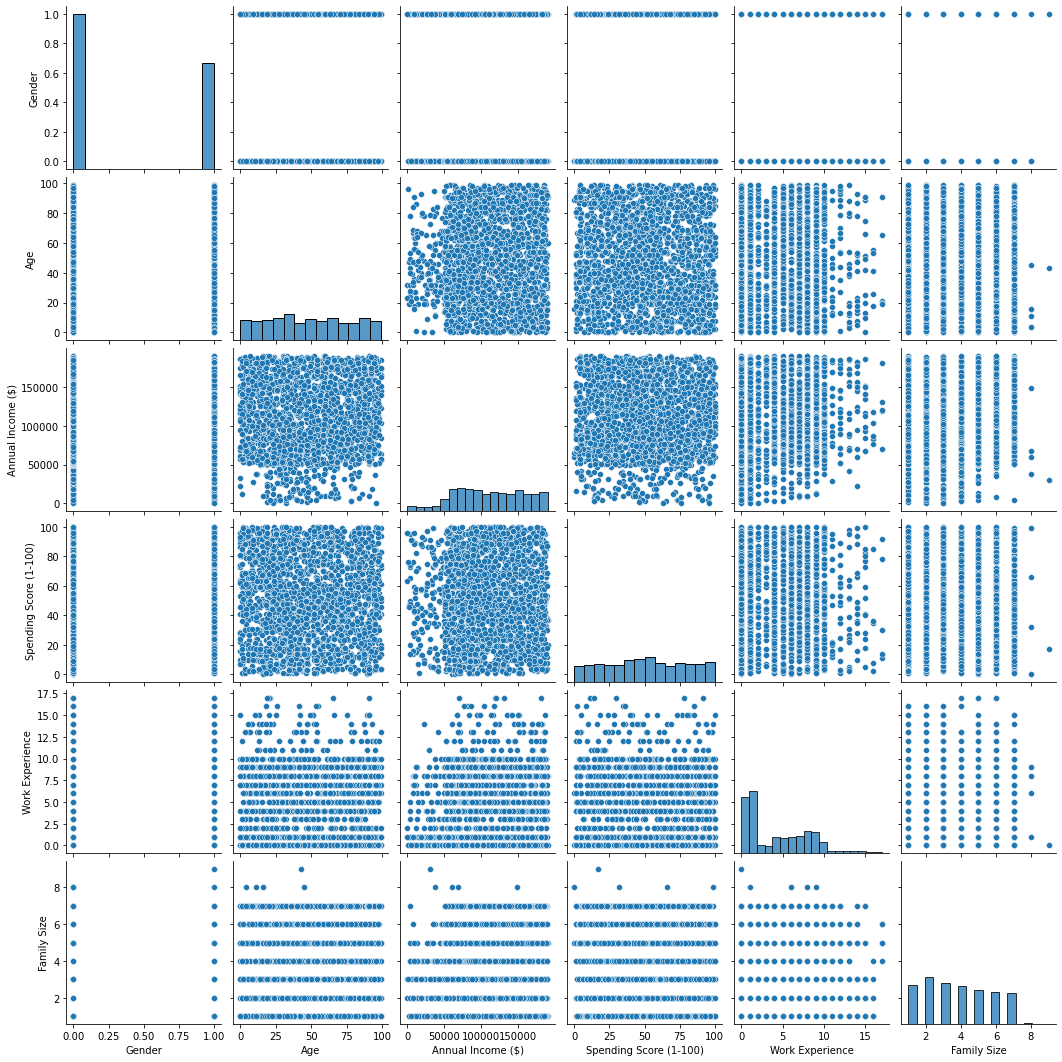

In [28]:
sns.pairplot(df.drop("CustomerID", axis=1))

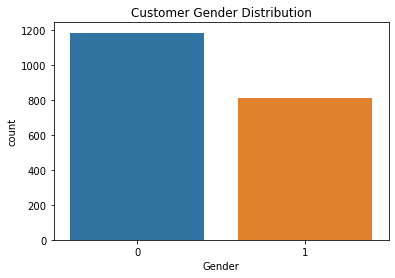

In [29]:
# segment customers by gender
sns.countplot(x='Gender', data=df)
plt.title('Customer Gender Distribution')
plt.show()

# segment customers by age

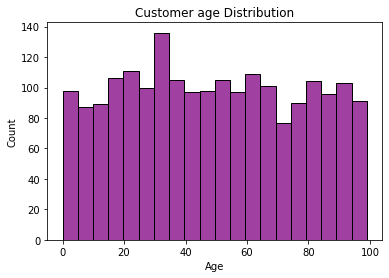

In [30]:

sns.histplot(x='Age', data=df ,color='purple', bins=20)
plt.title('Customer age Distribution')
plt.show()

# segment by income

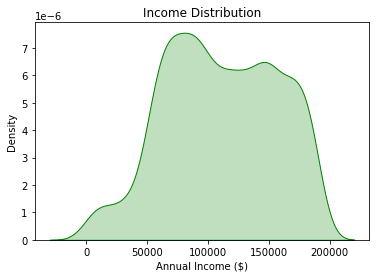

In [31]:
sns.kdeplot(x='Annual Income ($)', data=df, color="green", fill=True)
plt.title('Income Distribution')
plt.show()

# segment customers by profession

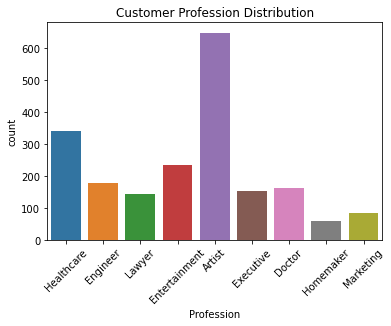

In [32]:
sns.countplot(x='Profession', data=df)
plt.xticks(rotation=45)
plt.title('Customer Profession Distribution')
plt.show()

# segment customers by work experience

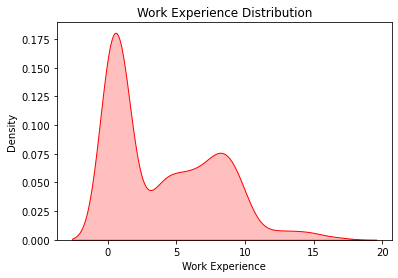

In [33]:
sns.kdeplot(x='Work Experience', data=df, color='red', fill=True)
plt.title('Work Experience Distribution')
plt.show()

# segment customers by family size

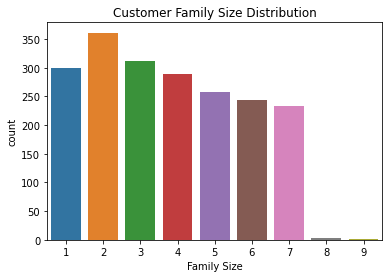

In [34]:
sns.countplot(x='Family Size', data=df)
plt.title('Customer Family Size Distribution')
plt.show()

# spending score by gender

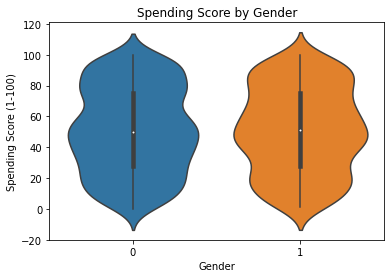

In [35]:
sns.violinplot(x='Gender', y='Spending Score (1-100)', data=df)
plt.title('Spending Score by Gender')
plt.show()

# spending behavior by age

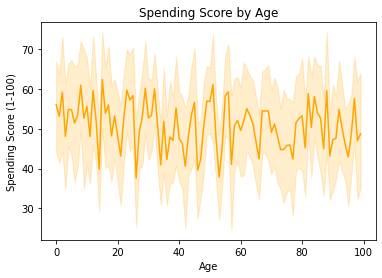

In [36]:
sns.lineplot(x='Age', y='Spending Score (1-100)', color="orange", data=df)
plt.title('Spending Score by Age')
plt.show()

# analyze spending behavior by age and gender

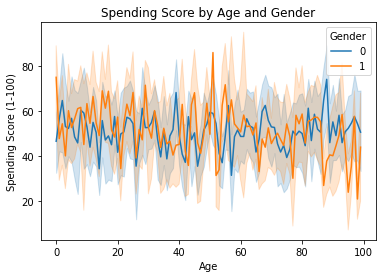

In [37]:
sns.lineplot(x='Age', y='Spending Score (1-100)', hue='Gender', data=df)
plt.title('Spending Score by Age and Gender')
plt.show()

# spending behavior by profession

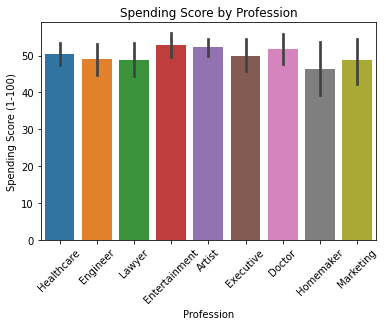

In [38]:
sns.barplot(x='Profession', y='Spending Score (1-100)', data=df)
plt.xticks(rotation=45)
plt.title('Spending Score by Profession')
plt.show()

 # spending behavior by work experience

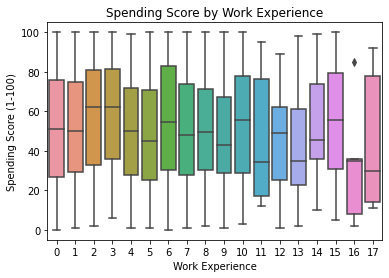

In [39]:
sns.boxplot(x='Work Experience', y='Spending Score (1-100)', data=df)
plt.title('Spending Score by Work Experience')
plt.show()

# spending behavior by family size

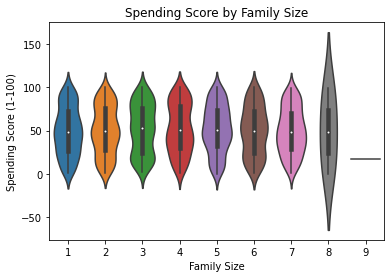

In [40]:
sns.violinplot(x='Family Size', y='Spending Score (1-100)', data=df)
plt.title('Spending Score by Family Size')
plt.show()

#find x and y

In [53]:
x=df.drop(columns=["Annual Income ($)","Profession"],axis=1)
y=df["Annual Income ($)"]
print(x)
print(y)

      CustomerID  Gender  Age  Spending Score (1-100)  Work Experience  \
0              1       1   19                      39                1   
1              2       1   21                      81                3   
2              3       0   20                       6                1   
3              4       0   23                      77                0   
4              5       0   31                      40                2   
...          ...     ...  ...                     ...              ...   
1995        1996       0   71                      40                8   
1996        1997       0   91                      32                7   
1997        1998       1   87                      14                9   
1998        1999       1   77                       4                7   
1999        2000       1   90                      52                5   

      Family Size  
0               4  
1               3  
2               1  
3               2  
4          

#spliting data

In [54]:
from sklearn.model_selection import train_test_split

# Assuming you have defined and assigned values to x and y here
# x should contain the input features, and y should contain the target labels

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)


#feature scaling

In [55]:

from sklearn.preprocessing import LabelEncoder

# Assuming y_train contains the target labels as strings
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)




#modeltrain

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

model1=LinearRegression()
model2=DecisionTreeRegressor()

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)

DecisionTreeRegressor()

#predict

In [57]:
model1_pre=model1.predict(x_test)
model2_pre=model2.predict(x_test)

#for new customer

In [ ]:

    
CustomerID = int(input("Enter id no.:-"))
Gender = input("Enter your gender")
Age = int(input("Enter your age"))
Annual_Income = int(input("Enter your Annual Income"))
Spending_Score = int(input("Enter your Spending Score (1-100)"))
Profession = input("Enter your profession")
Work_Experience = int(input("Enter your Work Experience"))
Family_Size = int(input("Enter your Family Size"))

person = [[CustomerID, Age, Annual_Income, Spending_Score, Profession, Work_Experience, Family_Size]]
result = model1.predict(person)

print("Predicted result:", result[0])
if result[0] >= 50000:
    print("Rich and hardworking person")
else:
    print("Not a rich and hardworking person")


Enter id no.:-5
Enter your gender0
Enter your age56
Enter your Annual Income52689
Enter your Spending Score (1-100)66
Enter your professionking
Enter your Work Experience6


#output

In [70]:
from sklearn.metrics import  r2_score
print('_________model1_________')
print(r2_score(y_test,model1_pre)*100)

print('_________model2_________')
print(r2_score(y_test,model2_pre)*100)


_________model1_________
9.871086448547695
_________model2_________
-56.99724643270048
